# 2018-04-24 - Génerer des sets de MotionClouds statiques
On va génerer des ensembles de 500 MotionClouds statiques pour différentes valeurs de B$\theta$ et $\theta$, dans le but de faire apprendre à un réseau convolutionné la détection de l'orientation $\theta$. Plus B$\theta$ est grand, moins la détection de l'orientation devrait être facile :

In [ ]:
N_B_thetas = 7

B_thetas = np.pi*np.logspace(-6, -1, N_B_thetas, base=2)
print(B_thetas)

In [ ]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import random
downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_B_thetas = 3

bw_values= np.pi*np.logspace(-6, -1, N_B_thetas, base=2)

fig_width = 21

bw_values = np.asarray([0.6,0.9, 1.57079633])
fig, axs = plt.subplots(1, N_B_thetas, figsize=(fig_width, fig_width/N_B_thetas))

for i_ax, B_theta in enumerate(bw_values):
    theta = random.randint(0,180)
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=theta/180*np.pi, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
                
    axs[i_ax].imshow(im[:, :, 0], cmap=plt.gray())
    axs[i_ax].text(20, 20, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='white', fontsize=32)
    #axs[i_ax].text(170, 20, r'$\theta=%.1f$°' % (theta), color='white', fontsize=32)
    axs[i_ax].set_xticks([])
    axs[i_ax].set_yticks([])
    print(theta)
plt.tight_layout()

fig.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)
plt.savefig('./figs/MC.pdf',format='pdf')

In [ ]:
#un joli polarplot
import numpy as np
import matplotlib.pyplot as plt

angle_list = [131, 140, 38]
angle_list2 = [16, 72, 117]



f, axs = plt.subplots(1, 3, subplot_kw=dict(projection='polar'), figsize = (10,10))
for i_ax, angle in enumerate(angle_list):
    xs = (0,np.pi*angle_list[i_ax]/180)
    ys = (0,1.6)
    axs[i_ax].plot(xs, ys, lw = 6, color = 'g')

    axs[i_ax].set_rmax(2)

    axs[i_ax].set_rticks([])  # less radial ticks
    axs[i_ax].set_rlabel_position(-22.5)  # get radial labels away from plotted line
    axs[i_ax].grid(True)
    
plt.tight_layout()
plt.show()
f.subplots_adjust(hspace = .0, wspace = .0, left=0.0, bottom=0., right=1., top=1.)
f.savefig('./figs/Polar_plot.pdf',format='pdf', bbox_inches = 'tight') 


On commence par génerer un ensemble de 500 clouds pour B$\theta$ appartenant à [1°:15°] pour $\theta$ = 0, $\theta$ = $\pi$/4, $\theta$ = $\pi$/2, $\theta$ = 3$\pi$/4.
Pour chaque $\theta$, on va créer un folder spécifique ou seront sauvegardés les 500 clouds.
![Err : Impossible d'afficher le cercle trigonométrique](http://etc.usf.edu/clipart/43200/43215/unit-circle7_43215_sm.gif)
On crée aussi un folder de 25 clouds qui serviront à tester le réseau.

In [ ]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 500
N_theta_test = 25

bw_values = np.pi*np.logspace(-7,-3.5, N_theta, base=2)
bw_test_values = np.pi*np.logspace(-7,-3.5, N_theta_test, base=2)
fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta

for t in theta_list :
    if not os.path.exists('./clouds_easy/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_easy/%s' % t)
    
    for i_ax, B_theta in enumerate(bw_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        im = im
        imageio.imwrite('./clouds_easy/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()       

for t in theta_list :
    if not os.path.exists('./clouds_easy/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_easy/%s' % t)
    if not os.path.exists('./clouds_easy_test/%s' % t):
        os.makedirs('./clouds_easy_test/%s' % t)

    for i_ax, B_theta in enumerate(bw_test_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_easy_test/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

Pour des valeurs de B$\theta$ entre 15° et 30° (un peu plus dur) :

In [ ]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 500
N_theta_test = 25

bw_values = np.pi*np.logspace(-3.5, -2.5, N_theta, base=2)
bw_test_values = np.pi*np.logspace(-3.5,-2.5, N_theta_test, base=2)

fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta
for t in theta_list :
    if not os.path.exists('./clouds_medium/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_medium/%s' % t)

    for i_ax, B_theta in enumerate(bw_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        
        imageio.imwrite('./clouds_medium/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()
        
for t in theta_list :
    if not os.path.exists('./clouds_medium_test/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_medium_test/%s' % t)

    for i_ax, B_theta in enumerate(bw_test_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_medium_test/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

Et enfin pour des valeurs de B$\theta$ entre 30° et 45° (difficile) :

In [ ]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio

downscale = 1
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

N_theta = 500
N_theta_test = 25

bw_values = np.pi*np.logspace(-2.5,-2, N_theta, base=2)
bw_test_values = np.pi*np.logspace(-2.5,-2, N_theta_test, base=2)

fig_width = 21
print('Btheta list : \n'+str( bw_values*180/np.pi))

theta_list = [0,np.pi/2, np.pi/4, 3*np.pi/4] #liste des angles theta

for t in theta_list :
    if not os.path.exists('./clouds_hard/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_hard/%s' % t)

    for i_ax, B_theta in enumerate(bw_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_hard/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

for t in theta_list :
    if not os.path.exists('./clouds_hard_test/%s' % t): #si le folder n'existe pas on le crée
        os.makedirs('./clouds_hard_test/%s' % t)

    for i_ax, B_theta in enumerate(bw_test_values):
        mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0., B_V=0, theta=t, B_theta=B_theta)
        im = mc.random_cloud(mc_i)
        
        imageio.imwrite('./clouds_hard_test/%s/B0 %s.png' % (t , (B_theta*180/np.pi) ) , im[:, :, 0])

        #plt.imshow(im[:, :, 0], cmap=plt.gray())
        #plt.text(5, 29, r'$B_\theta=%.1f$°' % (B_theta*180/np.pi), color='yellow', fontsize=32)
        #plt.show()

# Figure Ring Model

/home/hugo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


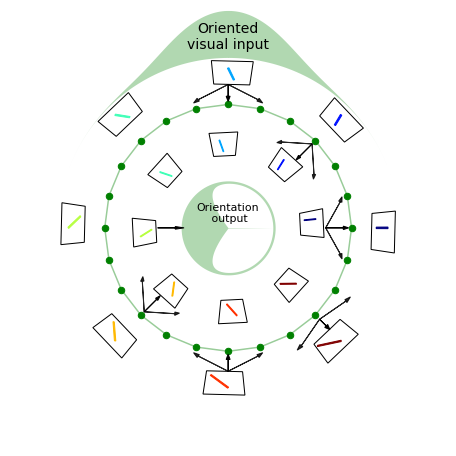

In [52]:
import matplotlib.patches as patches
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Arrow
from matplotlib.colors import hsv_to_rgb
from matplotlib.collections import PatchCollection

def envelope(th, theta, B_theta):
    if B_theta==np.inf:
        env = np.ones_like(th) 
    elif B_theta==0:
        env = np.zeros_like(th)
        env[np.argmin(th < theta)] = 1.
    else:
        env = np.exp((np.cos(2*(th-theta))-1)/4/B_theta**2)
    return env/env.max()      

patch_list = []
fig = plt.figure(figsize=(8, 8))

ax2 = fig.add_subplot(111, alpha=0.)
ax2.set_facecolor((1,1,1,0))
ax = fig.add_subplot(111, projection='polar', alpha=0.)
ax.set_facecolor((1,1,1,0))

opts= dict(ha='center', fontsize=14)
opts_small= dict(ha='center', fontsize=11)
N = 24
s = 42
theta = np.linspace(0, 2*np.pi, N+1, endpoint=True)

## connexions
N_arrow = 1 #number of connection arrows 
dthetas = alphas = np.linspace(-N_arrow, N_arrow, 2*N_arrow+1, endpoint=True)
dthetas *= 1.75*np.pi/N
alphas = np.exp( - alphas**2/ .4**2 / 2)

for dtheta, alpha in zip(dthetas, alphas): #extra-layers arrows
    #feedforward arrows
    plt.arrow(np.pi/2, 1.22, dtheta, -.1, color='k', alpha=alpha, head_width = .03)
    plt.arrow(np.pi/4, 1.01, dtheta, -.15, color='k', alpha=alpha, head_width = .03)
    plt.arrow(5*np.pi/4, 1.01, dtheta, -.15, color='k', alpha=alpha, head_width = .03)
    plt.arrow(-np.pi/2, 1.22, dtheta, -.1, color='k', alpha=alpha, head_width = .03)
    #plt.arrow(np.pi, .82, dtheta, -.1, color='k', alpha=alpha, head_width = .03)
    #feedback arrows
    plt.arrow(0, .83, dtheta, .15, color='k', alpha=alpha, head_width = .03)
    plt.arrow(-np.pi/4, 1.1, dtheta, .08, color='k', alpha=alpha, head_width = .03)
    
    
    #plt.arrow(np.pi, 1.25, dtheta, 0., color='b', alpha=alpha)
    #set_connectionstyle("arc,angleA=0,armA=30,rad=10")
#set_arrowstyle("Fancy,head_length=0.2")
N_arrow = 0 #number of connection arrows 
dthetas = alphas = np.linspace(-N_arrow, N_arrow, 2*N_arrow+1, endpoint=True)
dthetas *= 1.75*np.pi/N
alphas = np.exp( - alphas**2/ .4**2 / 2)
for dtheta, alpha in zip(dthetas, alphas):
    plt.arrow(np.pi, .6, dtheta, -.15,color='k', alpha=alpha, head_width = .05)

## neurones
colors = theta
for r, c in zip([1.05, 1.4], ['g', 'k']): #scattering neurons
    if c!= 'k':
        ax.plot(theta, r*np.ones_like(theta), c=c, alpha=.4) #ring drawing
        c = ax.scatter(theta[:-1], r*np.ones_like(theta[:-1]), c=c, s=s)
    
theta = np.linspace(0, 2*np.pi, 8+1, endpoint=True)
rad = 1.36
ys = np.ones_like(theta[:-1])
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(theta[:-1]))))
for i,xs in enumerate(theta[:-1]):
    ax.arrow(x=xs,y=rad*ys[i],
                        dx=-0.05*i*(np.pi/8), dy=-0.1,
                        width=.01, color=next(colors), 
             head_width=0)
        # Create a Rectangle patch
    rect = patches.Rectangle((xs-.15,rad*ys[i]-.13),.25,.2,linewidth=1,edgecolor='k',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    #ax.Rectangle(xy = (xs-.5, rad*ys[i]), width = .5, height = .5)
    #c.set_alpha(0.15)
    
rad = .75
ys = np.ones_like(theta[:-1])
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,len(theta[:-1]))))
for i,xs in enumerate(theta[:-1]):
    ax.arrow(x=xs+.1,y=rad*ys[i],
                        dx=-0.05*i*(np.pi/8), dy=-0.1,
                        width=.01, color=next(colors), 
             head_width=0)
    rect = patches.Rectangle((xs-.1,rad*ys[i]-.13),.3,.2,linewidth=1,edgecolor='k',facecolor='none')
    ax.add_patch(rect)

## entrée
N = 1080
theta = np.linspace(0, 2*np.pi, N)
ax.fill_between(theta, 1.45, 1.45 + envelope(theta/2, np.pi/4, np.pi/24)/2.5, lw=0, color='g', alpha=.3)
ax.fill_between(theta, .4, .38 + envelope(theta/2, np.pi/2, np.pi/20)/-0.05, lw=0, color='g', alpha=.3)

ax.set_ylim((0, 1.85))


ax.text(np.pi/2, 1.52, 'Oriented\nvisual input', **opts)
ax.text(np.pi/2, 0.05, 'Orientation\n output', **opts_small)
#ax.text(np.pi, 1.9, 'Convolutional\nnetwork', **opts)
#ax.text(11*np.pi/12, 1.4,  'LSTM\nnetwork', **opts)
#ax.text(10*np.pi/12, 1.1,  '{', **opts)


N = 12
for theta in np.linspace(0, 2*np.pi, N, endpoint=False):
    r, angle, l = .15, theta, .1

    #ax.arrow((r-l/2)*np.sin(angle)+.5, (r-l/2)*np.cos(angle)+.5, l*np.sin(angle), l*np.cos(angle),
    #                    width=.06, color='r')
    #patch_list.append(n)

for ax_ in [ax, ax2]:
    ax_.grid(False, axis='both')

    ax_.set_xticks([])
    ax_.set_yticks([])
    ax_.set_axis_off()

#ax.add_collection(PatchCollection(patch_list))
#fig.subplots_adjust(hspace = .0, wspace = .0, left=0.01, bottom=0.01, right=.99, top=.99)
plt.show()
fig.savefig('./figs/Fig_ring_model.pdf',format='pdf', dpi=200, transparent = False, bbox_inches = 'tight')